In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('downloads/musk_csv.csv')

In [3]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
data.tail()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [5]:
data_np = data.values

In [6]:
data_np

array([[1, 'MUSK-211', '211_1+1', ..., -112, 96, 1],
       [2, 'MUSK-211', '211_1+10', ..., -136, 79, 1],
       [3, 'MUSK-211', '211_1+11', ..., -145, 39, 1],
       ...,
       [6596, 'NON-MUSK-jp13', 'jp13_2+7', ..., -144, -6, 0],
       [6597, 'NON-MUSK-jp13', 'jp13_2+8', ..., -116, 117, 0],
       [6598, 'NON-MUSK-jp13', 'jp13_2+9', ..., -115, 118, 0]],
      dtype=object)

In [7]:
np.random.shuffle(data_np)

In [8]:
X = data_np[:, 3:-1]

In [9]:
X.shape

(6598, 166)

In [10]:
data.shape

(6598, 170)

In [11]:
y = data_np[:, -1]

In [12]:
y.shape

(6598,)

In [13]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

In [14]:
# from sklearn.preprocessing import OneHotEncoder

In [15]:
# ohe = OneHotEncoder()

In [16]:
# y_res= ohe.fit_transform(y.reshape(-1,1)).todense()

In [17]:
# y_res.shape

In [18]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [19]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [20]:
model = Sequential()

W1214 19:20:52.739090  5248 deprecation_wrapper.py:119] From c:\users\inn\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [21]:
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))

W1214 19:20:53.436606  5248 deprecation_wrapper.py:119] From c:\users\inn\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1214 19:20:53.441603  5248 deprecation_wrapper.py:119] From c:\users\inn\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [22]:
model.add(Dense(64, activation='relu'))

In [23]:
model.add(Dropout(0.2))

W1214 19:20:54.785917  5248 deprecation_wrapper.py:119] From c:\users\inn\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1214 19:20:54.800908  5248 deprecation.py:506] From c:\users\inn\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
# model.add(Dense(64, activation='relu'))

In [25]:
# model.add(Dense(24, activation='relu'))

In [26]:
model.add(Dense(8, activation = 'relu'))

In [27]:
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

W1214 19:20:58.497176  5248 deprecation_wrapper.py:119] From c:\users\inn\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1214 19:20:58.525160  5248 deprecation_wrapper.py:119] From c:\users\inn\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1214 19:20:58.532155  5248 deprecation.py:323] From c:\users\inn\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               21376     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 30,161
Trainable params: 30,161
Non-trainable params: 0
_________________________________________________________________


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [32]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 1s 229us/step - loss: 1.2223 - acc: 0.8361 - f1_m: 0.0240 - precision_m: 0.0528 - recall_m: 0.0195 - val_loss: 0.4236 - val_acc: 0.8390 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
4222/4222 [==============================] - 1s 174us/step - loss: 0.4559 - acc: 0.8565 - f1_m: 0.1503 - precision_m: 0.2713 - recall_m: 0.1145 - val_loss: 0.2571 - val_acc: 0.8902 - val_f1_m: 0.4790 - val_precision_m: 0.8222 - val_recall_m: 0.3539
Epoch 3/100
4222/4222 [==============================] - 1s 120us/step - loss: 0.3478 - acc: 0.8986 - f1_m: 0.5421 - precision_m: 0.7202 - recall_m: 0.4800 - val_loss: 0.2758 - val_acc: 0.9252 - val_f1_m: 0.7229 - val_precision_m: 0.8068 - val_recall_m: 0.6950
Epoch 4/100
4222/4222 [==============================] - 1s 185us/step - loss: 0.2500 - acc: 0.9166 - f1_m: 0.6896 - precision_m: 0.7476 - recall_m: 0.6889 -

Epoch 32/100
4222/4222 [==============================] - 1s 210us/step - loss: 0.0563 - acc: 0.9884 - f1_m: 0.9555 - precision_m: 0.9581 - recall_m: 0.9601 - val_loss: 0.1341 - val_acc: 0.9754 - val_f1_m: 0.9050 - val_precision_m: 0.9585 - val_recall_m: 0.8719
Epoch 33/100
4222/4222 [==============================] - 1s 184us/step - loss: 0.0501 - acc: 0.9884 - f1_m: 0.9558 - precision_m: 0.9561 - recall_m: 0.9627 - val_loss: 0.0895 - val_acc: 0.9839 - val_f1_m: 0.9462 - val_precision_m: 0.9392 - val_recall_m: 0.9635
Epoch 34/100
4222/4222 [==============================] - 1s 164us/step - loss: 0.0777 - acc: 0.9889 - f1_m: 0.9531 - precision_m: 0.9645 - recall_m: 0.9527 - val_loss: 0.1951 - val_acc: 0.9725 - val_f1_m: 0.9020 - val_precision_m: 0.9848 - val_recall_m: 0.8483
Epoch 35/100
4222/4222 [==============================] - 1s 135us/step - loss: 0.0457 - acc: 0.9905 - f1_m: 0.9698 - precision_m: 0.9759 - recall_m: 0.9712 - val_loss: 0.2029 - val_acc: 0.9669 - val_f1_m: 0.8914 -

4222/4222 [==============================] - 1s 161us/step - loss: 0.0751 - acc: 0.9910 - f1_m: 0.9683 - precision_m: 0.9692 - recall_m: 0.9772 - val_loss: 0.1405 - val_acc: 0.9801 - val_f1_m: 0.9256 - val_precision_m: 0.9613 - val_recall_m: 0.9064
Epoch 64/100
4222/4222 [==============================] - 1s 137us/step - loss: 0.0807 - acc: 0.9901 - f1_m: 0.9644 - precision_m: 0.9667 - recall_m: 0.9738 - val_loss: 0.1272 - val_acc: 0.9820 - val_f1_m: 0.9419 - val_precision_m: 0.9301 - val_recall_m: 0.9635
Epoch 65/100
4222/4222 [==============================] - 1s 125us/step - loss: 0.0981 - acc: 0.9898 - f1_m: 0.9643 - precision_m: 0.9610 - recall_m: 0.9740 - val_loss: 0.4028 - val_acc: 0.9659 - val_f1_m: 0.8975 - val_precision_m: 0.8521 - val_recall_m: 0.9652
Epoch 66/100
4222/4222 [==============================] - 1s 140us/step - loss: 0.0910 - acc: 0.9910 - f1_m: 0.9655 - precision_m: 0.9698 - recall_m: 0.9707 - val_loss: 0.1542 - val_acc: 0.9839 - val_f1_m: 0.9451 - val_precisio

4222/4222 [==============================] - 1s 138us/step - loss: 0.0325 - acc: 0.9953 - f1_m: 0.9819 - precision_m: 0.9838 - recall_m: 0.9853 - val_loss: 0.1307 - val_acc: 0.9858 - val_f1_m: 0.9477 - val_precision_m: 0.9861 - val_recall_m: 0.9228
Epoch 95/100
4222/4222 [==============================] - 1s 138us/step - loss: 0.0455 - acc: 0.9938 - f1_m: 0.9736 - precision_m: 0.9802 - recall_m: 0.9711 - val_loss: 0.1600 - val_acc: 0.9811 - val_f1_m: 0.9317 - val_precision_m: 0.9674 - val_recall_m: 0.9144
Epoch 96/100
4222/4222 [==============================] - 0s 115us/step - loss: 0.0748 - acc: 0.9919 - f1_m: 0.9460 - precision_m: 0.9517 - recall_m: 0.9483 - val_loss: 0.1101 - val_acc: 0.9830 - val_f1_m: 0.9442 - val_precision_m: 0.9176 - val_recall_m: 0.9790
Epoch 97/100
4222/4222 [==============================] - 1s 157us/step - loss: 0.0198 - acc: 0.9972 - f1_m: 0.9835 - precision_m: 0.9818 - recall_m: 0.9871 - val_loss: 0.0852 - val_acc: 0.9886 - val_f1_m: 0.9602 - val_precisio

In [ ]:
X.shape[1]

In [ ]:
data_np

In [ ]:
y

In [ ]:
model.predict(X[1,:].reshape(1, -1))

In [ ]:
X[1, :].shape

In [33]:
import matplotlib.pyplot as plt

## Model Accuracy (Training and Validation)

dict_keys(['val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])


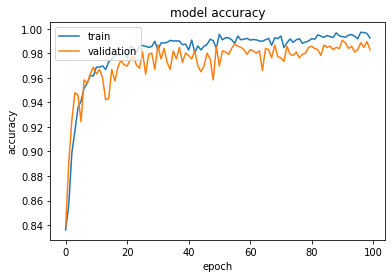

In [34]:
print(hist.history.keys())
#  "Accuracy"
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model Loss (Training and Validation)

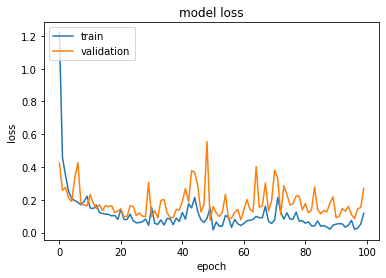

In [35]:
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Final Performance measures

In [37]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

# Loss

In [47]:
print("Test set Loss", loss)

Test set Loss 0.3415097875676717


# Accuracy

In [43]:
print("Test set Accuracy", accuracy)

Test set Accuracy 0.9787878787878788


# Precision

In [44]:
print(precision)

0.984377104585821


# Recall

In [45]:
print(recall)

0.875257336732113


# F1 Score

In [46]:
print(f1_score)

0.9189887339418584


In [48]:
model.save('downloads/task_model.h5')